In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [124]:
df = pd.read_csv('/content/Eps6-Data-Mall_Customers.csv')

print(df.head(3))
print('----------')
print('Shape: ', df.shape)
print(df.dtypes)
print('----------')
print(df.describe())
print('----------')
print('Data Null?')
print(df.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
----------
Shape:  (200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
----------
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000     

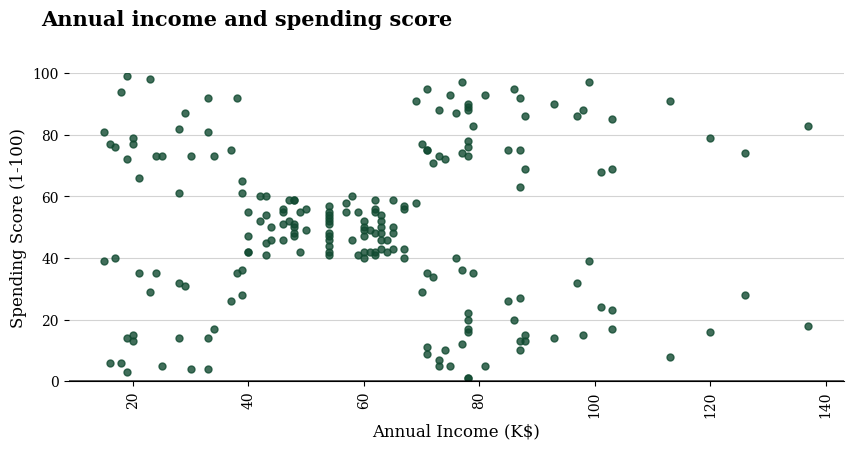

In [125]:
fig, ax = plt.subplots(figsize=(10, 4))

fig.text(0.097,1,'Annual income and spending score', fontfamily='serif', fontsize=15, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible('lightgray')

ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

plt.scatter(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=df, color='#114a31', s = 25, alpha = 0.8)

plt.yticks(fontsize = 10, fontfamily='serif', fontweight='light')
plt.xticks(fontsize = 10, fontfamily='serif', fontweight='light', rotation=90)

ax.set_ylabel('Spending Score (1-100)', fontfamily='serif', fontsize=12)
ax.set_xlabel('Annual Income (K$)', fontfamily='serif', fontsize=12)

ax.set_ylim(0, 100)
plt.axhline(y=0, color ='black', linewidth=1.3, alpha=.7)

plt.show()

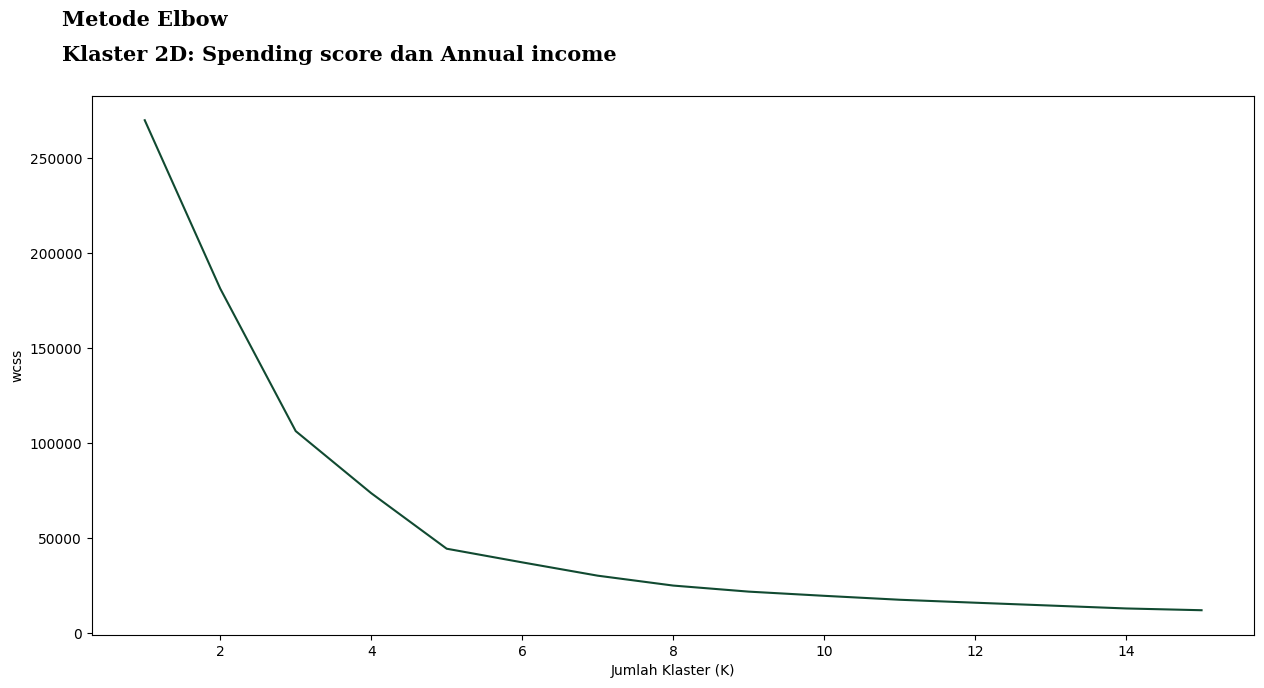

In [126]:
x = df.iloc[:, [3,4]].values

wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, .98, 'Metode Elbow', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Klaster 2D: Spending score dan Annual income', fontsize=15, fontweight='bold', fontfamily='serif')

plt.plot(range(1, 16), wcss, '#114a31')

plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('wcss')
plt.show()

In [127]:
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  y_means = clusterer.fit_predict(x)
  silhouette_avg = silhouette_score(x, y_means)

  print("Jumlah Klaster =", n_clusters,
        "nilai rata-rata silhouette =", silhouette_avg)

Jumlah Klaster = 3 nilai rata-rata silhouette = 0.46761358158775435
Jumlah Klaster = 4 nilai rata-rata silhouette = 0.4931963109249047
Jumlah Klaster = 5 nilai rata-rata silhouette = 0.553931997444648
Jumlah Klaster = 6 nilai rata-rata silhouette = 0.5379675585622219


In [128]:
selected_cols = ["Annual Income (k$)", "Spending Score (1-100)"]
cluster_data = df.loc[:,selected_cols]

kmeans_sel = KMeans(n_clusters = 5, random_state=0).fit(x)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
clustered_data

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [129]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Annual Income (k$),Spending Score (1-100)
0,0,55.3,49.5
1,1,86.5,82.1
2,2,88.2,17.1
3,3,26.3,20.9
4,4,25.7,79.4


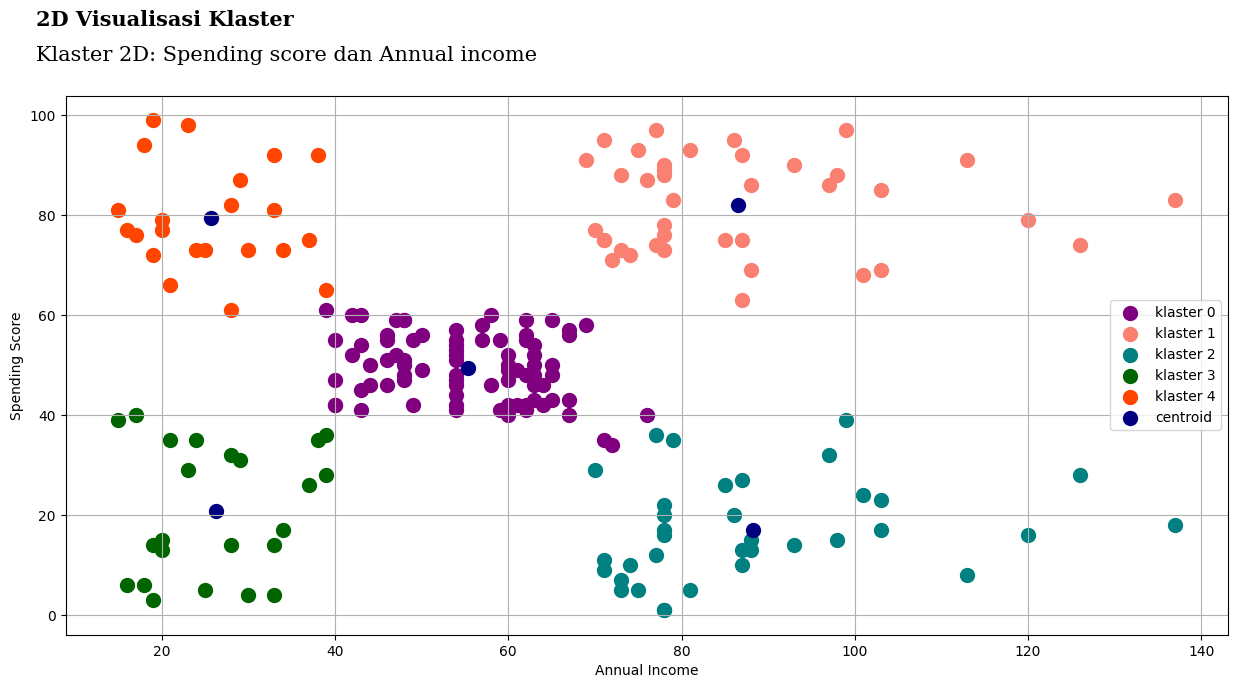

In [130]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, .98, '2D Visualisasi Klaster', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Klaster 2D: Spending score dan Annual income', fontsize=15, fontweight='light', fontfamily='serif')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100,
            c = 'purple', label = 'klaster 0')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100,
            c = 'salmon', label = 'klaster 1')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100,
            c = 'teal', label = 'klaster 2')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100,
            c = 'darkgreen', label = 'klaster 3')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100,
            c = 'orangered', label = 'klaster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100,
            c = 'navy', label = 'centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

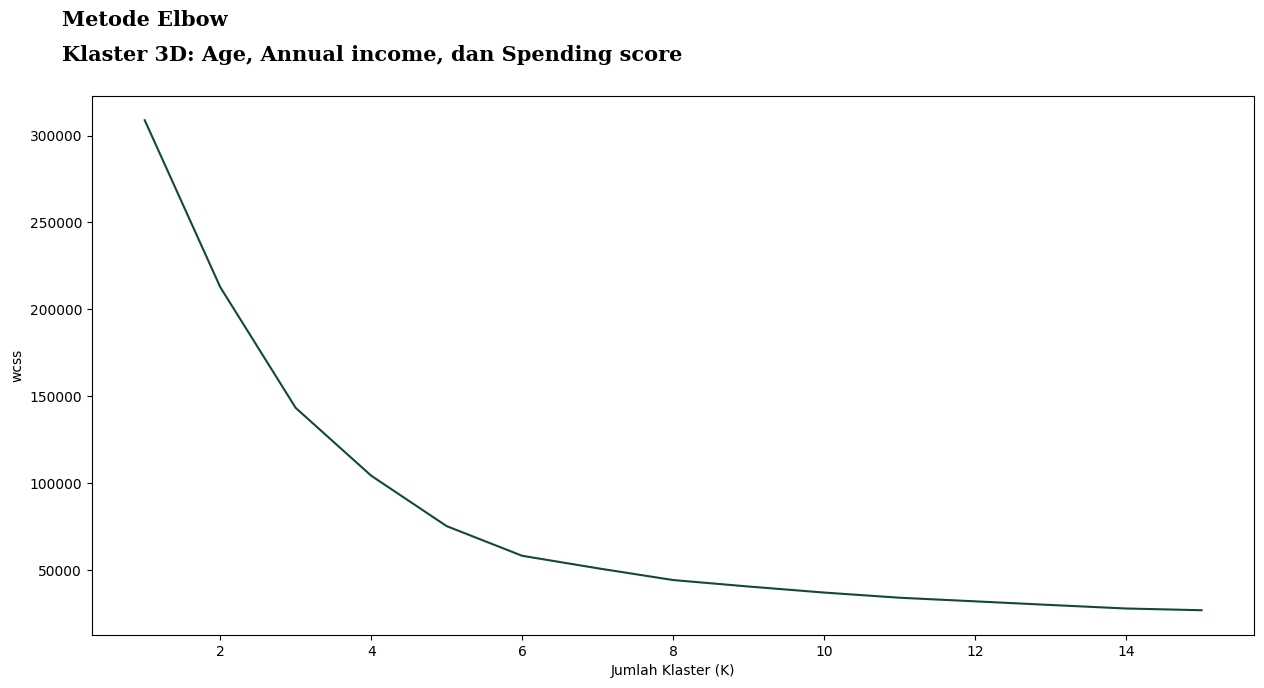

In [131]:
Z = df.iloc[:, [2, 3, 4]].values

wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 0)
    km.fit(Z)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, .98, 'Metode Elbow', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Klaster 3D: Age, Annual income, dan Spending score', fontsize=15, fontweight='bold', fontfamily='serif')

plt.plot(range(1, 16), wcss, '#114a31')

plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('wcss')
plt.show()

In [132]:
range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, init = 'k-means++',
                     max_iter = 300, n_init = 10, random_state = 0)
  y_means = clusterer.fit_predict(Z)
  silhouette_avg = silhouette_score(Z, y_means)

  print("Jumlah klaster = ", n_clusters,
        "nilai rata-rata silhouette =", silhouette_avg)

Jumlah klaster =  3 nilai rata-rata silhouette = 0.3839349967742105
Jumlah klaster =  4 nilai rata-rata silhouette = 0.40546302077733304
Jumlah klaster =  5 nilai rata-rata silhouette = 0.44428597560893024
Jumlah klaster =  6 nilai rata-rata silhouette = 0.4523443947724053
Jumlah klaster =  7 nilai rata-rata silhouette = 0.43978902692261157


In [133]:
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = df.loc[:, selected_cols]
kmeans_s = KMeans(n_clusters=6, random_state=0).fit(Z)
label=pd.DataFrame(kmeans_s.labels_)
clustered_data = cluster_data.assign(Cluster = label)
clustered_data

,Spending Score (1-100),Annual Income (k$),Age,Cluster
0,39,15,19,2
1,81,15,21,5
2,6,16,20,2
3,77,16,23,5
4,40,17,31,2
...,...,...,...,...
195,79,120,35,1
196,28,126,45,3
197,74,126,32,1
198,18,137,32,3


In [134]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Spending Score (1-100),Annual Income (k$),Age
0,0,49.4,53.7,56.3
1,1,82.1,86.5,32.7
2,2,20.3,25.8,44.3
3,3,16.8,88.7,41.6
4,4,48.4,57.5,27.3
5,5,78.6,26.3,25.5


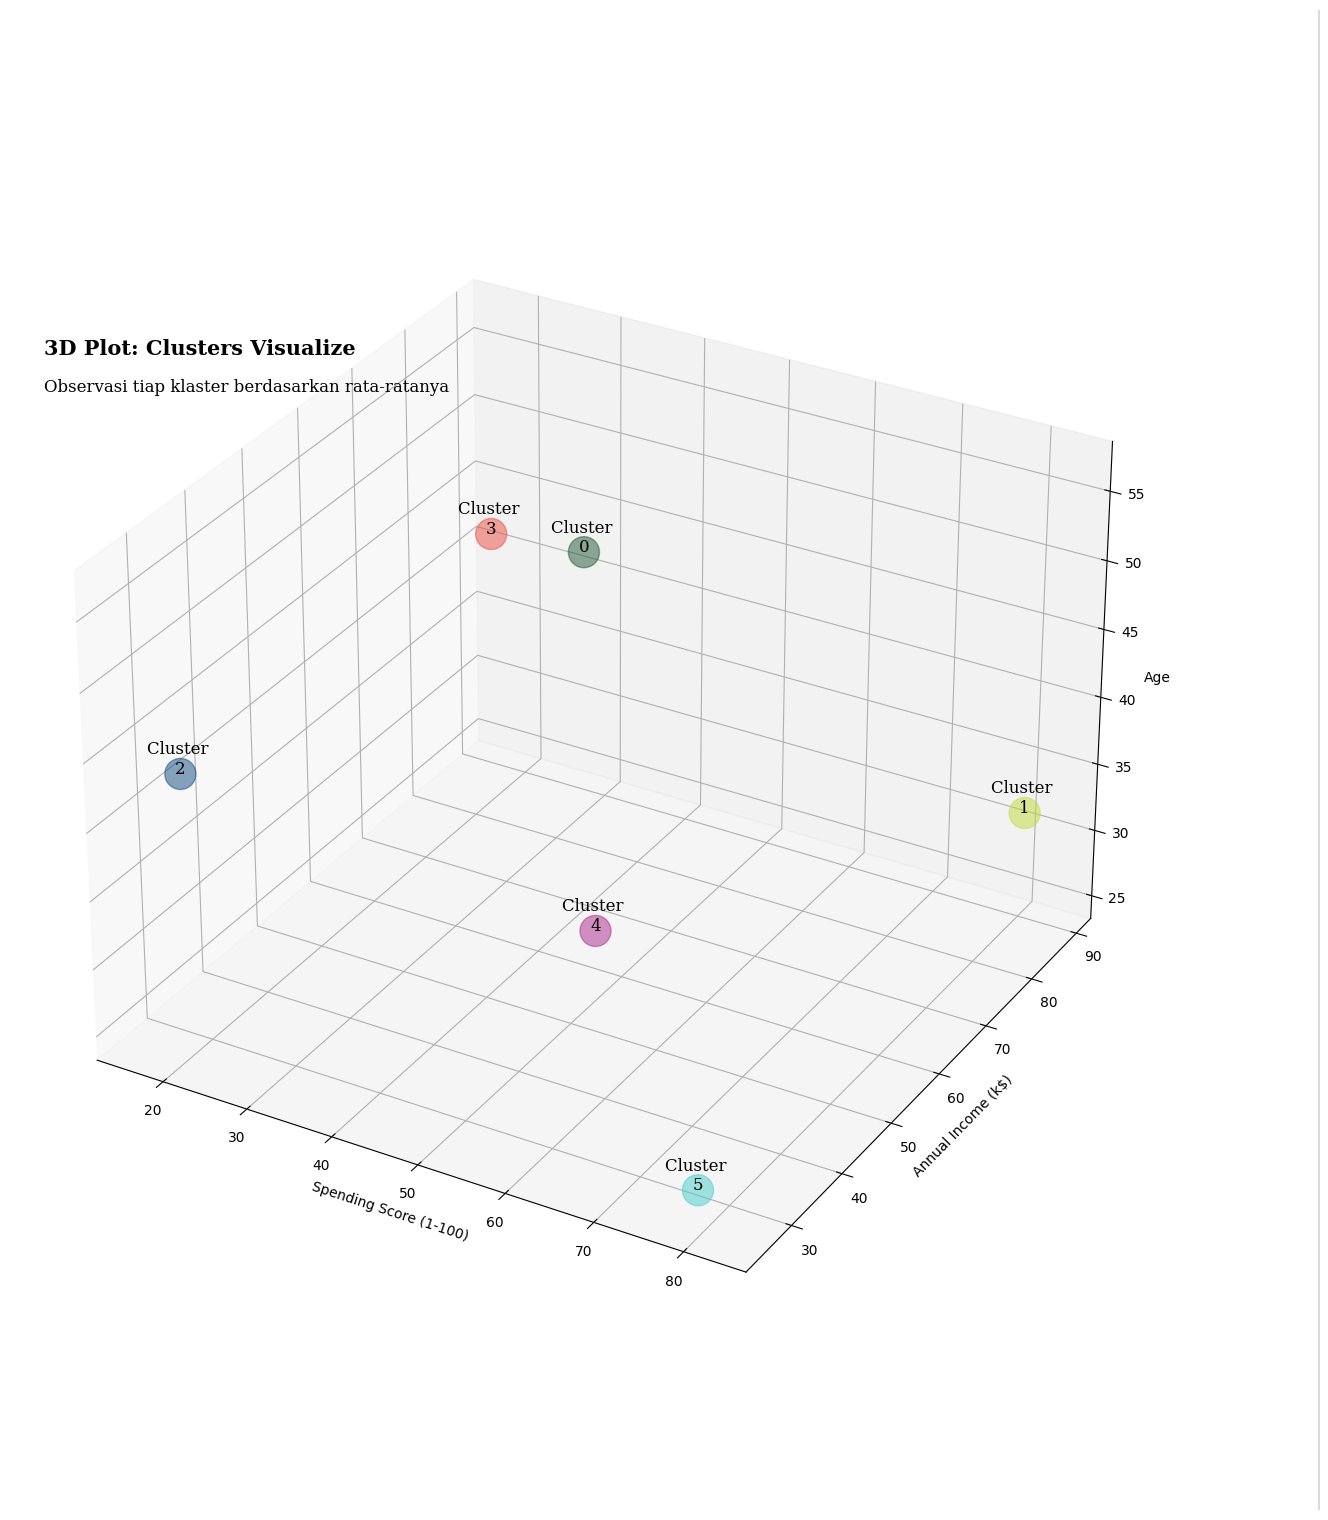

In [135]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_km2['Spending Score (1-100)'],
           grouped_km2["Annual Income (k$)"],
           grouped_km2["Age"],
           color=['#1d5933', '#c1db3b', '#0f4c81', '#eb4d42', '#ab298a', '#47cccc'],
           alpha=0.5, s =500)

for line in range(0, grouped_km.shape[0]):
  ax.text(grouped_km2['Spending Score (1-100)'][line],
          grouped_km2['Annual Income (k$)'][line], grouped_km2['Age'][line],
          s=('Cluster \n'+grouped_km2['Cluster'][line]),
          horizontalalignment='center', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_xlabel("Spending Score (1-100)")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Age")

fig.text(0.15, .77, '3D Plot: Clusters Visualize', fontsize=15,
         fontweight ='bold', fontfamily = 'serif')
fig.text(0.15, .745, 'Observasi tiap klaster berdasarkan rata-ratanya', fontsize = 12, fontweight='light', fontfamily='serif')

import matplotlib.pyplot as lines
l1 = lines.Line2D([1, 1], [0, 1], transform = fig.transFigure, figure = fig, color = 'black', lw = 0.2)

fig.lines.extend([l1])

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/Eps6-Data-Mall_Customers.csv')

X = df[['Age', 'Spending Score (1-100)']].values

In [137]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

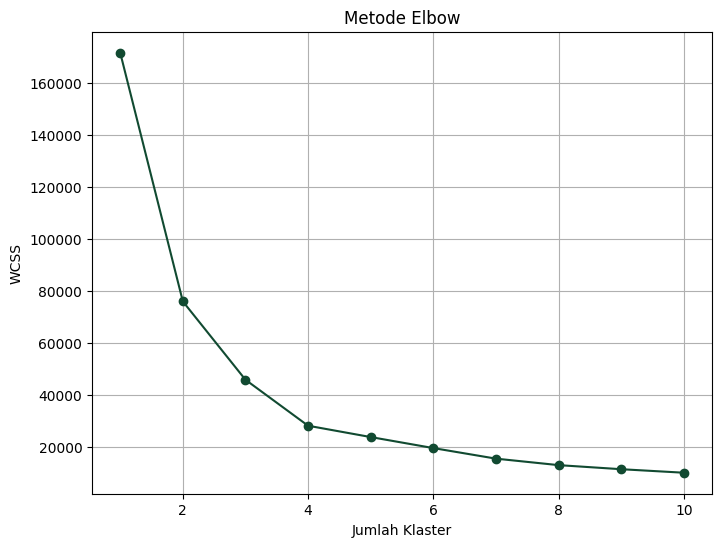

In [138]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='#114a31')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [139]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

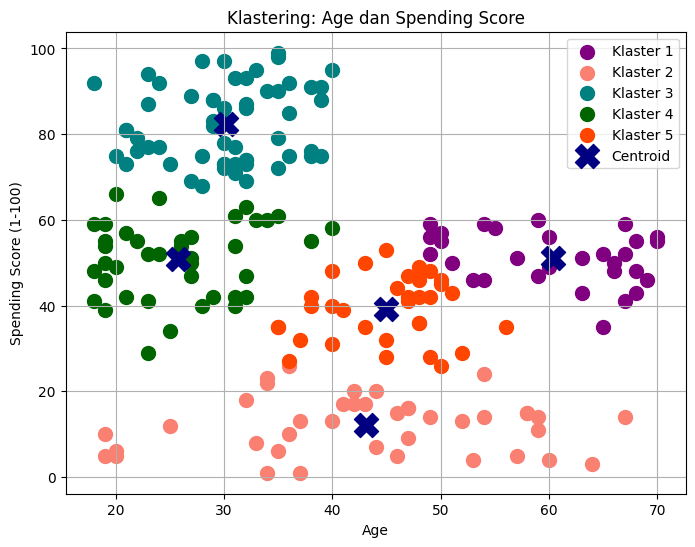

Silhouette Score: 0.44526667994351227


In [140]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='purple', label='Klaster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='salmon', label='Klaster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='teal', label='Klaster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='darkgreen', label='Klaster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='orangered', label='Klaster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='navy', label='Centroid', marker='X')

plt.title('Klastering: Age dan Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')